<a href="https://colab.research.google.com/github/So-AI-love/chatgpt-prompts-for-academic-writing/blob/main/diffusers_doc/en/quicktour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quicktour

Diffusion models are trained to denoise random Gaussian noise step-by-step to generate a sample of interest, such as an image or audio. This has sparked a tremendous amount of interest in generative AI, and you have probably seen examples of diffusion generated images on the internet. 🧨 Diffusers is a library aimed at making diffusion models widely accessible to everyone.

Whether you're a developer or an everyday user, this quicktour will introduce you to 🧨 Diffusers and help you get up and generating quickly! There are three main components of the library to know about:

* The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is a high-level end-to-end class designed to rapidly generate samples from pretrained diffusion models for inference.
* Popular pretrained [model](https://huggingface.co/docs/diffusers/main/en/./api/models) architectures and modules that can be used as building blocks for creating diffusion systems.
* Many different [schedulers](https://huggingface.co/docs/diffusers/main/en/./api/schedulers/overview) - algorithms that control how noise is added for training, and how to generate denoised images during inference.

The quicktour will show you how to use the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for inference, and then walk you through how to combine a model and scheduler to replicate what's happening inside the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline).

<Tip>

The quicktour is a simplified version of the introductory 🧨 Diffusers [notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb) to help you get started quickly. If you want to learn more about 🧨 Diffusers goal, design philosophy, and additional details about it's core API, check out the notebook!

</Tip>

Before you begin, make sure you have all the necessary libraries installed:

In [1]:
# uncomment to install the necessary libraries in Colab
#!pip install --upgrade diffusers accelerate transformers

- [🤗 Accelerate](https://huggingface.co/docs/accelerate/index) speeds up model loading for inference and training.
- [🤗 Transformers](https://huggingface.co/docs/transformers/index) is required to run the most popular diffusion models, such as [Stable Diffusion](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/overview).

## DiffusionPipeline

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is the easiest way to use a pretrained diffusion system for inference. It is an end-to-end system containing the model and the scheduler. You can use the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) out-of-the-box for many tasks. Take a look at the table below for some supported tasks, and for a complete list of supported tasks, check out the [🧨 Diffusers Summary](https://huggingface.co/docs/diffusers/main/en/./api/pipelines/overview#diffusers-summary) table.

| **Task**                     | **Description**                                                                                              | **Pipeline**
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|
| Unconditional Image Generation          | generate an image from Gaussian noise | [unconditional_image_generation](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/unconditional_image_generation) |
| Text-Guided Image Generation | generate an image given a text prompt | [conditional_image_generation](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/conditional_image_generation) |
| Text-Guided Image-to-Image Translation     | adapt an image guided by a text prompt | [img2img](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/img2img) |
| Text-Guided Image-Inpainting          | fill the masked part of an image given the image, the mask and a text prompt | [inpaint](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/inpaint) |
| Text-Guided Depth-to-Image Translation | adapt parts of an image guided by a text prompt while preserving structure via depth estimation | [depth2img](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/depth2img) |

Start by creating an instance of a [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and specify which pipeline checkpoint you would like to download.
You can use the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for any [checkpoint](https://huggingface.co/models?library=diffusers&sort=downloads) stored on the Hugging Face Hub.
In this quicktour, you'll load the [`stable-diffusion-v1-5`](https://huggingface.co/runwayml/stable-diffusion-v1-5) checkpoint for text-to-image generation.

<Tip warning={true}>

For [Stable Diffusion](https://huggingface.co/CompVis/stable-diffusion) models, please carefully read the [license](https://huggingface.co/spaces/CompVis/stable-diffusion-license) first before running the model. 🧨 Diffusers implements a [`safety_checker`](https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/safety_checker.py) to prevent offensive or harmful content, but the model's improved image generation capabilities can still produce potentially harmful content.

</Tip>

Load the model with the [from_pretrained()](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline.from_pretrained) method:

In [2]:
!pip install --upgrade diffusers accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [3]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) downloads and caches all modeling, tokenization, and scheduling components. You'll see that the Stable Diffusion pipeline is composed of the [UNet2DConditionModel](https://huggingface.co/docs/diffusers/main/en/api/models/unet2d-cond#diffusers.UNet2DConditionModel) and [PNDMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/pndm#diffusers.PNDMScheduler) among other things:

In [4]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

We strongly recommend running the pipeline on a GPU because the model consists of roughly 1.4 billion parameters.
You can move the generator object to a GPU, just like you would in PyTorch:

In [5]:
pipeline.to("cuda") #"cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Now you can pass a text prompt to the `pipeline` to generate an image, and then access the denoised image. By default, the image output is wrapped in a [`PIL.Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=image#the-image-class) object.

In [6]:
Text = """
Pitch Deck For:

Unleashing the Light: Managing the Dark Triad through Dialogue and Charity

1. Identify key aspects of startup pitch deck.


The key aspects of Dark Triad that need to be addressed in the context of managing it through conversation and charity are:

1. Understanding the traits: It is important to have a clear understanding of the three traits that make up the Dark Triad - Machiavellianism, narcissism, and psychopathy. Each of these traits has its own characteristics and can manifest in different ways. Understanding these traits can help in identifying them and managing them effectively.

2. Self-awareness: Self-awareness is crucial in managing the Dark Triad. It involves being aware of one's own thoughts, feelings, and behaviors and how they may be influenced by these traits. This can help in recognizing when these traits are being triggered and taking steps to manage them.

3. Communication skills: Effective communication is key in managing the Dark Triad. This includes being able to express oneself clearly and assertively, as well as actively listening to others. Good communication skills can help in resolving conflicts and building positive relationships.

4. Empathy: Empathy is the ability to understand and share the feelings of others. It can help in managing the Dark Triad by promoting understanding and compassion towards others, rather than manipulating or exploiting them.

5. Mindfulness: Practicing mindfulness can help in managing the Dark Triad by increasing self-awareness and promoting a non-judgmental attitude towards oneself and others. It can also help in managing impulsive and destructive behaviors.

6. Charity and altruism: Engaging in charitable work and acts of kindness can help in managing the Dark Triad by promoting empathy and compassion towards others. It can also help in shifting the focus from self-centeredness to the well-being of others.

7. Seeking professional help: In some cases, managing the Dark Triad may require seeking professional help. A therapist or counselor can provide support and guidance in managing these traits and developing healthier coping mechanisms.

In conclusion, managing the Dark Triad through conversation and charity involves a combination of self-awareness, effective communication, empathy, mindfulness, and seeking professional help when needed. It is an ongoing process that requires effort and dedication, but can ultimately lead to healthier and more fulfilling relationships.
2. Create a mind map of startup elements.


Main Elements of Dark Triad:
1. Machiavellianism
2. Narcissism
3. Psychopathy

Management through Conversation and Charity:
1. Dialogue and communication
2. Empathy and understanding
3. Self-reflection and self-awareness
4. Giving back to others
5. Building positive relationships
6. Promoting altruistic behavior
7. Encouraging selflessness
8. Fostering a sense of community
9. Promoting emotional intelligence
10. Encouraging self-control and self-regulation

Interconnectedness:
1. Dialogue and communication can help manage Machiavellianism by promoting honest and open communication, reducing manipulation and deceitful behavior.
2. Empathy and understanding can help manage narcissism by promoting a sense of empathy and compassion towards others, reducing self-centeredness and grandiosity.
3. Self-reflection and self-awareness can help manage psychopathy by promoting introspection and recognition of one's own actions and their impact on others, reducing impulsive and callous behavior.
4. Giving back to others through charity work can help manage all three traits by promoting a sense of altruism and selflessness, reducing selfish and exploitative behavior.
5. Building positive relationships can help manage all three traits by promoting healthy and supportive connections, reducing isolation and mistrust.
6. Promoting emotional intelligence can help manage all three traits by promoting self-awareness and regulation of emotions, reducing impulsivity and aggression.
7. Encouraging self-control and self-regulation can help manage all three traits by promoting self-discipline and restraint, reducing impulsive and destructive behavior.
8. Fostering a sense of community can help manage all three traits by promoting a sense of belonging and connection, reducing feelings of alienation and detachment.
9. Promoting altruistic behavior can help manage all three traits by promoting acts of kindness and generosity, reducing self-centered and manipulative behavior.
10. Encouraging selflessness can help manage all three traits by promoting a focus on the needs and well-being of others, reducing selfish and exploitative behavior.
3. Brainstorm ideas for startup improvement.


- Implementing a system for self-reflection and self-awareness to recognize and manage dark traits
- Encouraging open and honest communication within the group to address and resolve conflicts
- Organizing group therapy sessions to discuss and understand the root causes of dark traits
- Incorporating mindfulness and meditation practices to promote empathy and compassion
- Collaborating with charities and volunteering opportunities to promote altruism and giving back to the community
- Educating individuals on the negative impact of the Dark Triad and the benefits of managing these traits
- Providing resources and support for individuals to seek professional help for managing dark traits
- Creating a safe and non-judgmental environment for individuals to share their struggles and seek support from others
- Encouraging positive reinforcement and recognition for individuals who demonstrate positive changes in managing their dark traits
- Promoting self-care and self-love to combat feelings of worthlessness and insecurity that may contribute to dark traits
- Developing a mentorship program where individuals with strong light traits can guide and support those struggling with dark traits.
4. Share ideas for startup improvement.
 Here are some ideas to improve Dark Triad and its management through conversation and charity:

1. Promote self-awareness and reflection: One way to improve Dark Triad traits is to encourage individuals to become more self-aware and reflect on their behavior and actions. This can be done through regular self-reflection exercises, therapy, or even journaling. By understanding their own tendencies towards Machiavellianism, narcissism, and psychopathy, individuals can work towards managing these traits better.

2. Encourage empathy and perspective-taking: One of the key characteristics of the Dark Triad is a lack of empathy and concern for others. By promoting empathy and perspective-taking, individuals can learn to understand and consider the feelings and perspectives of others. This can be done through volunteering or participating in charitable activities that involve interacting with people from different backgrounds.

3. Foster open and honest communication: Communication is key in managing the Dark Triad traits. By fostering open and honest communication, individuals can learn to express their thoughts and feelings in a healthy and constructive manner. This can also help in building trust and understanding among individuals, leading to better management of the Dark Triad.

4. Educate about the consequences of Dark Triad behavior: Many individuals with Dark Triad traits may not be aware of the negative impact their behavior can have on others. By educating them about the consequences of their actions, they may be more motivated to work on managing their traits. This can be done through workshops, seminars, or even through personal discussions.

5. Encourage self-reflection and accountability: It's important for individuals with Dark Triad traits to take responsibility for their actions and their impact on others. By encouraging self-reflection and accountability, individuals can learn to recognize when their behavior is influenced by their Dark Triad traits and take steps to manage them.

6. Promote positive role models: Role models can have a significant influence on individuals, especially those with Dark Triad traits. By promoting positive role models who exhibit healthy and ethical behavior, individuals can learn to emulate these traits and manage their own Dark Triad tendencies.

7. Provide support and resources: Managing the Dark Triad traits can be challenging, and individuals may need support and resources to do so effectively. This can include access to therapy, support groups, or even online resources that provide information and strategies for managing these traits.

8. Encourage self-care and stress management: Individuals with Dark Triad traits may be more prone to stress and burnout due to their tendencies towards manipulation and exploitation. Encouraging self-care and stress management techniques can help individuals cope with these challenges and prevent them from resorting to their Dark Triad traits.

9. Address underlying issues: It's important to recognize that the Dark Triad traits may stem from underlying issues such as past trauma or low self-esteem. By addressing these underlying issues, individuals can work towards managing their Dark Triad traits more effectively.

10. Promote a culture of accountability and ethical behavior: In order to effectively manage the Dark Triad, it's important to create a culture of accountability and ethical behavior. This can be done by setting clear expectations and consequences for unethical behavior and promoting a culture of transparency and fairness.
5. Identify startup problems for solutions.
  One way to create the problem in Dark Triad is through manipulation and deceit. People with these traits are skilled at manipulating others to get what they want, often at the expense of others. This can create a toxic and unhealthy dynamic in relationships and conversations. To manage this, engaging in open and honest communication can help. By being transparent and direct, it becomes harder for individuals with Dark Triad traits to manipulate and deceive others. Additionally, practicing empathy and actively listening can help in managing these traits. By understanding the perspective of others and showing genuine care and concern, it can counteract the selfish and manipulative tendencies of the Dark Triad.  Another way to create the problem is through grandiosity and self-centeredness. People with narcissistic traits often have an inflated sense of self-importance and believe they are superior to others. This can lead to a lack of empathy and disregard for others' feelings and needs. To manage this, engaging in charitable work can help. By focusing on helping others and giving back to the community, it can help individuals with narcissistic traits develop a sense of humility and perspective. Additionally, engaging in conversations that challenge their beliefs and encourage self-reflection can also be beneficial.  Lastly, psychopathy can create problems in relationships and conversations through a lack of remorse and empathy, as well as impulsive and manipulative behavior. To manage this, it's important to establish clear boundaries and consequences for harmful behavior. Engaging in conversations that address the impact of their actions on others and encouraging them to take responsibility for their behavior can also help manage these traits. Additionally, engaging in charity work that focuses on helping those who have been hurt by psychopathic behavior can also be beneficial.  In conclusion, managing the Dark Triad traits of Machiavellianism, narcissism, and psychopathy can be challenging, but through open and honest communication, empathy, self-reflection, and charitable work, it is possible to create a healthier and more positive dynamic in relationships and conversations. By addressing the core of darkness and promoting the vulnerability of light, we can work towards a more compassionate and understanding society.
6. Apply SCAMPER method to startup.


S - Substitute: Instead of using the trolling system to instill the idea of worthlessness in others, substitute it with positive reinforcement and empathy. This can be achieved through active listening and understanding the perspectives of others.

C - Combine: Combine the concept of dialogue and charity with mindfulness techniques to help individuals become more aware of their thoughts and actions. This can help them recognize and manage their dark traits.

A - Adapt: Adapt the conversation and charity approach to different situations and individuals. For example, in a workplace setting, the focus can be on promoting teamwork and collaboration, while in a personal setting, the focus can be on building healthy relationships.

M - Modify: Modify the conversation and charity approach to include education and awareness about the Dark Triad. This can help individuals understand the impact of their actions and work towards managing their traits.

P - Put to another use: Instead of using the trolling system to harm others, put it to use in a positive way by using it as a tool for self-reflection and growth. This can help individuals recognize their dark traits and work towards improving themselves.

E - Eliminate: Eliminate the use of the trolling system and other negative methods to manage the Dark Triad. Instead, focus on promoting positive behaviors and actions through conversation and charity.

R - Rearrange: Rearrange the focus of conversation and charity from solely managing the Dark Triad to also promoting positive traits and behaviors. This can help individuals develop a more balanced and healthy personality.

By applying the SCAMPER method, we can come up with new and innovative ways to manage the Dark Triad through conversation and charity. This can help individuals recognize and manage their dark traits, leading to healthier relationships and a more positive impact on society.
7. Assemble diverse team for startup.
  The group should consist of individuals from various backgrounds, such as psychology, sociology, philosophy, and neuroscience, to provide a diverse perspective on the topic. It is also essential to include individuals who have personal experience with the Dark Triad, whether as a victim or as someone who has exhibited these traits in the past. This will provide a more personal and empathetic understanding of the issue.  The group should also include individuals from different cultures and demographics to ensure a global perspective on the topic. This will help in understanding how the Dark Triad manifests in different societies and how it can be managed in a culturally sensitive manner.  The goal of the group would be to have open and honest discussions about the Dark Triad and its impact on individuals and society. The group can also brainstorm and come up with innovative ways to promote dialogue and charity as a means of managing these traits. This can include creating awareness campaigns, organizing charity events, and developing educational materials.  It is also crucial for the group to collaborate with existing organizations and initiatives that focus on mental health and promoting positive traits in individuals. This will help in creating a more comprehensive approach to managing the Dark Triad.  Overall, the group should aim to raise awareness about the Dark Triad and its management through dialogue and charity. By bringing together a diverse group of individuals, we can create a more holistic and effective approach to tackling this issue.
8. Envision successful startup future.


In this future state, the management of the Dark Triad has been successfully addressed through the use of conversation and charity. This approach has been proven effective through a study conducted in 2023, which found that engaging in these activities for four months can help manage the traits of Machiavellianism, narcissism, and psychopathy.

To achieve this success, various methods have been brainstormed and implemented to promote dialogue and charitable work. One of the key factors in this approach is the recognition of the trolling system, which uses the core of darkness to devalue others and promote self-centeredness. By understanding and addressing this system, individuals are able to shift towards more productive and empathetic conversations.

However, it is also important to acknowledge that the vulnerability and unconscious induction of the core of darkness can hinder the progress of conversation and charity. This process, which can be triggered by trauma or other factors, can be compared to hypnotism and can prevent individuals from fully engaging in dialogue and charitable work.

To address this issue, studies and conceptual views of the Dark Triad model have been extensively discussed. This includes the concept of the memetic code and the idea of a conceptual life, or memplex, related to the Dark and Light Triad in the human species. By studying the vulnerability of light features against the Dark Triad, researchers have been able to strengthen conceptual life and promote healthier behaviors.

As a result, new codes and models have been developed to address the Dark Triad and promote positive behaviors. These codes and models have been continuously refined and improved upon, leading to the successful management of the Dark Triad through conversation and charity.

Looking back, it is clear that this future state was achieved through a series of events and decisions. It started with the recognition of the trolling system and the understanding of its impact on conversations. This led to the development of new codes and models, which were continuously improved upon through research and discussions. Finally, by promoting dialogue and charity, individuals were able to manage the traits of the Dark Triad and create a more empathetic and understanding society.

"""

Token indices sequence length is longer than the specified maximum sequence length for this model (3239 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["the three traits that make up the dark triad - machiavellianism, narcissism, and psychopathy. each of these traits has its own characteristics and can manifest in different ways. understanding these traits can help in identifying them and managing them effectively. 2. self - awareness : self - awareness is crucial in managing the dark triad. it involves being aware of one's own thoughts, feelings, and behaviors and how they may be influenced by these traits. this can help in recognizing when these traits are being triggered and taking steps to manage them. 3. communication skills : effective communication is key in managing the dark triad. this includes being able to express oneself clearly and assertive

  0%|          | 0/50 [00:00<?, ?it/s]

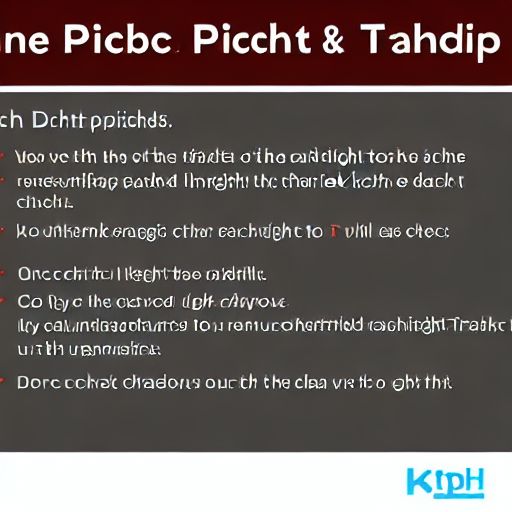

In [7]:


image = pipeline("one pitch tech report weblog cover photo with no text in image for :"+Text).images[0] #"An image of a squirrel in Picasso style").images[0]
image

In [ ]:
image.save("image_of_squirrel_painting.png")

#There are some others example codes at this Huggingface model page:
https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder

```python
from diffusers import AutoPipelineForImage2Image
import torch

pipe = AutoPipelineForImage2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe.enable_model_cpu_offload()

prompt = "A fantasy landscape, Cinematic lighting"
negative_prompt = "low quality, bad quality"

image = pipe(prompt=prompt, image=original_image, strength=0.3, height=768, width=768).images[0]

out.images[0].save("fantasy_land.png")
```

In [9]:
!pip install diffusers transformers accelerate

In [10]:
from diffusers import AutoPipelineForImage2Image
import torch

pipe = AutoPipelineForImage2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

NameError: ignored

In [14]:

from diffusers.utils import load_image

original_image = load_image(
    "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main" "/kandinsky/cat.png"
)
original_image = load_image(
   "https://www.slidemembers.com/en_US/view/Single-Slides/startup-pitch-deck-cover-design-13655#"
)
prompt = Text #"A fantasy landscape, Cinematic lighting"
negative_prompt = "low quality, bad quality,Text in image"

image = pipe(prompt=prompt, image=original_image, strength=0.3, height=768, width=768).images[0]

UnidentifiedImageError: ignored

In [13]:
image
image.save("fantasy_land.png")

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "portrait of a young women, blue eyes, cinematic"
negative_prompt = "low quality, bad quality"

image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale =1.0, height=768, width=768).images[0]
image.save("portrait.png")

In [ ]:
from diffusers import KandinskyV22PriorPipeline, KandinskyV22Pipeline
from diffusers.utils import load_image
import PIL

import torch

pipe_prior = KandinskyV22PriorPipeline.from_pretrained(
    "kandinsky-community/kandinsky-2-2-prior", torch_dtype=torch.float16
)
pipe_prior.to("cuda")

img1 = load_image(
    "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main" "/kandinsky/cat.png"
)

img2 = load_image(
    "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main" "/kandinsky/starry_night.jpeg"
)

# add all the conditions we want to interpolate, can be either text or image
images_texts = ["a cat", img1, img2]

# specify the weights for each condition in images_texts
weights = [0.3, 0.3, 0.4]

# We can leave the prompt empty
prompt = ""
prior_out = pipe_prior.interpolate(images_texts, weights)

pipe = KandinskyV22Pipeline.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(**prior_out, height=768, width=768).images[0]

image.save("starry_cat.png")

### Local pipeline

You can also use the pipeline locally. The only difference is you need to download the weights first:

```bash
!git lfs install
!git clone https://huggingface.co/runwayml/stable-diffusion-v1-5
```

Then load the saved weights into the pipeline:

In [ ]:
!git lfs install
!git clone https://huggingface.co/runwayml/stable-diffusion-v1-5

In [ ]:
pipeline = DiffusionPipeline.from_pretrained("./stable-diffusion-v1-5")

Now you can run the pipeline as you would in the section above.

### Swapping schedulers

Different schedulers come with different denoising speeds and quality trade-offs. The best way to find out which one works best for you is to try them out! One of the main features of 🧨 Diffusers is to allow you to easily switch between schedulers. For example, to replace the default [PNDMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/pndm#diffusers.PNDMScheduler) with the [EulerDiscreteScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/euler#diffusers.EulerDiscreteScheduler), load it with the [from_config()](https://huggingface.co/docs/diffusers/main/en/api/configuration#diffusers.ConfigMixin.from_config) method:

In [ ]:
from diffusers import EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

Try generating an image with the new scheduler and see if you notice a difference!

In the next section, you'll take a closer look at the components - the model and scheduler - that make up the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and learn how to use these components to generate an image of a cat.

## Models

Most models take a noisy sample, and at each timestep it predicts the *noise residual* (other models learn to predict the previous sample directly or the velocity or [`v-prediction`](https://github.com/huggingface/diffusers/blob/5e5ce13e2f89ac45a0066cb3f369462a3cf1d9ef/src/diffusers/schedulers/scheduling_ddim.py#L110)), the difference between a less noisy image and the input image. You can mix and match models to create other diffusion systems.

Models are initiated with the [from_pretrained()](https://huggingface.co/docs/diffusers/main/en/api/models/overview#diffusers.ModelMixin.from_pretrained) method which also locally caches the model weights so it is faster the next time you load the model. For the quicktour, you'll load the [UNet2DModel](https://huggingface.co/docs/diffusers/main/en/api/models/unet2d#diffusers.UNet2DModel), a basic unconditional image generation model with a checkpoint trained on cat images:

In [ ]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id)

To access the model parameters, call `model.config`:

In [ ]:
model.config

The model configuration is a 🧊 frozen 🧊 dictionary, which means those parameters can't be changed after the model is created. This is intentional and ensures that the parameters used to define the model architecture at the start remain the same, while other parameters can still be adjusted during inference.

Some of the most important parameters are:

* `sample_size`: the height and width dimension of the input sample.
* `in_channels`: the number of input channels of the input sample.
* `down_block_types` and `up_block_types`: the type of down- and upsampling blocks used to create the UNet architecture.
* `block_out_channels`: the number of output channels of the downsampling blocks; also used in reverse order for the number of input channels of the upsampling blocks.
* `layers_per_block`: the number of ResNet blocks present in each UNet block.

To use the model for inference, create the image shape with random Gaussian noise. It should have a `batch` axis because the model can receive multiple random noises, a `channel` axis corresponding to the number of input channels, and a `sample_size` axis for the height and width of the image:

In [ ]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

For inference, pass the noisy image to the model and a `timestep`. The `timestep` indicates how noisy the input image is, with more noise at the beginning and less at the end. This helps the model determine its position in the diffusion process, whether it is closer to the start or the end. Use the `sample` method to get the model output:

In [ ]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

To generate actual examples though, you'll need a scheduler to guide the denoising process. In the next section, you'll learn how to couple a model with a scheduler.

## Schedulers

Schedulers manage going from a noisy sample to a less noisy sample given the model output - in this case, it is the `noisy_residual`.

<Tip>

🧨 Diffusers is a toolbox for building diffusion systems. While the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is a convenient way to get started with a pre-built diffusion system, you can also choose your own model and scheduler components separately to build a custom diffusion system.

</Tip>

For the quicktour, you'll instantiate the [DDPMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddpm#diffusers.DDPMScheduler) with it's [from_config()](https://huggingface.co/docs/diffusers/main/en/api/configuration#diffusers.ConfigMixin.from_config) method:

In [ ]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_config(repo_id)
scheduler

<Tip>

💡 Notice how the scheduler is instantiated from a configuration. Unlike a model, a scheduler does not have trainable weights and is parameter-free!

</Tip>

Some of the most important parameters are:

* `num_train_timesteps`: the length of the denoising process or in other words, the number of timesteps required to process random Gaussian noise into a data sample.
* `beta_schedule`: the type of noise schedule to use for inference and training.
* `beta_start` and `beta_end`: the start and end noise values for the noise schedule.

To predict a slightly less noisy image, pass the following to the scheduler's [step()](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddpm#diffusers.DDPMScheduler.step) method: model output, `timestep`, and current `sample`.

In [ ]:
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
less_noisy_sample.shape

The `less_noisy_sample` can be passed to the next `timestep` where it'll get even less noisier! Let's bring it all together now and visualize the entire denoising process.

First, create a function that postprocesses and displays the denoised image as a `PIL.Image`:

In [ ]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

To speed up the denoising process, move the input and model to a GPU:

In [ ]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

Now create a denoising loop that predicts the residual of the less noisy sample, and computes the less noisy sample with the scheduler:

In [ ]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)

Sit back and watch as a cat is generated from nothing but noise! 😻

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/diffusion-quicktour.png"/>
</div>

## Next steps

Hopefully you generated some cool images with 🧨 Diffusers in this quicktour! For your next steps, you can:

* Train or finetune a model to generate your own images in the [training](https://huggingface.co/docs/diffusers/main/en/./tutorials/basic_training) tutorial.
* See example official and community [training or finetuning scripts](https://github.com/huggingface/diffusers/tree/main/examples#-diffusers-examples) for a variety of use cases.
* Learn more about loading, accessing, changing and comparing schedulers in the [Using different Schedulers](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/schedulers) guide.
* Explore prompt engineering, speed and memory optimizations, and tips and tricks for generating higher quality images with the [Stable Diffusion](https://huggingface.co/docs/diffusers/main/en/./stable_diffusion) guide.
* Dive deeper into speeding up 🧨 Diffusers with guides on [optimized PyTorch on a GPU](https://huggingface.co/docs/diffusers/main/en/./optimization/fp16), and inference guides for running [Stable Diffusion on Apple Silicon (M1/M2)](https://huggingface.co/docs/diffusers/main/en/./optimization/mps) and [ONNX Runtime](https://huggingface.co/docs/diffusers/main/en/./optimization/onnx).